# EM算法

EM算法，也称期望最大算法，存在隐变量时特别适用。

第一步求期望，第二步最大

## EM算法推导

对m个样本$x=(x_1, x_2, ..., x_m)$,根据模型参数（参数的概念，可以参考李航书中关于3枚硬币的例子）$\theta$，极大化模型分布的对数似然函数。
$$
\theta = \underset{\theta}{argmax} \sum_{i=1}^{m}log P(x_i;\theta)
$$
如果有未观察到的变量$z=z_1,z_2,...,z_m$，如LDA模型中单词分布。此时极大化模型分布的对数函数：
$$
\theta = \underset{\theta}{argmax} \sum_{i=1}^{m}log P(x_i;\theta) = \underset{\theta}{argmax} \sum_{i=1}^{m}log\sum_{z_i}P(x_i,z_i;\theta)
$$
因为存在中间变量，无法求出，引入Jensen不等式，假设$z$属于未知新分布$Q_i(z_i)$，其中$Q_i(z_i) \geqslant 0; \sum_{z_i} Q_i(z_i) = 1$,为其概率（连续变量，则为其概率密度函数)，利用Jensen不等式(推导见附录部分):
$$
{\sum_{i=1}^{m}log\sum_{z_i}P(x_i,z_i;\theta) = \sum_{i=1}^{z_i} log\sum_{z_i} Q_i(z_i) \frac{P(x_i,z_i;\theta)}{Q_i(z_i)} \\
\geqslant \sum_{i=1}^{m}\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i;\theta)}{Q_i(z_i)}}\ \ \ \ \ \ \ \ \  \ (1)
$$
满足不等式想等，则需要：
$$
\frac{P(x_i,z_i;\theta)}{Q_i(z_i)} = c,c为常数
$$
因为$\sum_{z_i} Q_i(z_i)=1$，所以，$c = \sum_{z_i}P(x_i,z_i;\theta)$,于是
$$
Q_i(z_i) = \frac{P(x_i,z_i;\theta)}{\sum_{z}P(x_i,z_i;\theta)} = \frac{P(x_i,z_i;\theta)}{P(x_i;\theta)} = P(z_i|x_i;\theta)
$$
此时最大化（1）式是我们最大化似然函数的下界，只要最大化下界，就是最大化目标函数。
$$
\underset{\theta}{argmax} \sum_{i=1}^{m}\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i;\theta)}{Q_i(z_i)} \ \ \ \ \ \ \ \ (2)
$$

## 算法步骤

第一步：初始化$\theta$

第二步：重复E-Step，M-Step

1. 根据初始值/上一步计算出来的参数，计算出来$Q_i(z_i) = P(z_i|x_i;\theta)$
   2. 根据上一步，计算式（2），得到新的参数$\theta$;求导数时，省去常数项目c，对先验分布求导数（参考周志华高斯混合聚类）


## Jensen不等式的加权版本
$$
f(\sum_{i=1}^{n}a_i \cdot x_i) \leqslant \sum_{i=1}^{n}a_if(x_i), \sum_{i=1}^{n}a_i = 1, a_i > 0
$$

## 注意点
**EM算法对初始点选择比较敏感，可能陷入局部最优**

# 高斯混合聚类
核心是假设数据是由k个高斯分布混合而成，每个数据的概率也由k个高斯分布混合而成。

高维空间高斯分布概率密度函数：
$$
p(\pmb{x})=\frac{1}{(2\pi)^\frac{n}{2}|\sum|^\frac{1}{2}}e^{-\frac{1}{2}(\pmb{x}-\pmb{\mu})^T{\sum}^{-1}(\pmb{x}-\pmb{\mu})}
$$
由此，定义高斯混合分布：
$$
p_{m}=\sum_{i=1}^{k}\alpha_i \cdot p(\pmb{x}|\pmb{\mu}_i,{\sum}_i)\\
s.t. \ \ \ \ \sum_{i=1}^{k}\alpha_i=1,\alpha_i>0
$$
该分布为k个混合成分组成，每个混合成分对应一个高斯分布。

数据集$D=\{\pmb{x}_1,\pmb{x}_2,...,\pmb{x}_m\}$由上述混合高斯过程生成，令随机变量$z_j \in {1,2,...,k}$表示样本$x_j$的高斯混合成分，其取值未知。显然，$z_j$的先验概率$P(z_j=i)$对应于$\alpha_i(1,2,...,k)$。 根据贝叶斯定理，$z_j$的后验概率对应于
$$
{p_{m}(z_j=i|\pmb{x}_j)=\frac{p(z_j=i).p_{m}(x_j|z_j=i)}{p_{m}(\pmb{x}_i)}\\
=\frac{\alpha_i \cdot p(\pmb{x}_j|\pmb{\mu}_j{\sum}_i)}{\sum_{i=1}^{k}\alpha_i \cdot p(\pmb{x}|\pmb{\mu}_i,{\sum}_i)}
}
$$


$p_{m}(z_j=i| \pmb{x}_j)$表示样本$\pmb{x}_j$由第$i$个高斯混合成分生成的后验概率。为了方便表述，由$\gamma_{ji}(i=1,2,...,k)$表示。

则高斯混合聚类将样本划分为k个簇，$C=\{C_1,C_2,...,C_K\}$，每个样本的簇标记就是概率最大的那个：
$$
\lambda_j=\underset{i \in \{1,2,...,l\}}{arg\ max}\ \gamma_{ji}
$$
EM算法求解：求倒数，以及引入柆格郎日因子，得到$\pmb{\mu},\sum,\alpha$表达式

实操参考：https://sklearn.apachecn.org/docs/master/20.html，https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture


多元高斯分布：https://zhuanlan.zhihu.com/p/58987388

模型优点：不仅可以分类，还可以输出每个类概率，是混合模型学习算法中最快的算法（相比于k-means要慢）;拟合形状较为丰富。

缺点：EM算法可能陷入局部最优，如果数据点不够，协方差矩阵估计很难，除非人为正则化相应协防差。需要做分量选择（BIC准则），使用变分贝叶斯高斯混合（@TODO）可以避免。

应用范围：如风控，反欺诈等

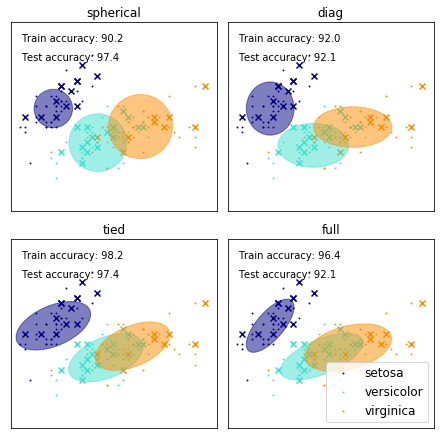

In [9]:
# 来自sklean
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=1)
n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()